In [1]:
%load_ext autoreload
%autoreload 2
from trade.datamanager import (
    DividendDataManager,
    SpotDataManager,
    OptionSpotDataManager,
    VolDataManager,
    RatesDataManager,
    BaseDataManager,
    ForwardDataManager,
    assert_synchronized_model,
)

from trade.datamanager._enums import OptionSpotEndpointSource, SeriesId, OptionPricingModel, VolatilityModel, RealTimeFallbackOption
from trade.optionlib.config.types import DivType
from trade.helpers.helper_types import SingletonMetaClass
from trade.datamanager.vars import LOADED_NAMES
LOADED_NAMES

/Users/chiemelienwanisobi/miniconda3/envs/openbb_new_use/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


2026-01-26 21:07:20 trade.helpers.Logging INFO: Logging Root Directory: /Users/chiemelienwanisobi/cloned_repos/QuantTools/logs
2026-01-26 21:07:20 [test] trade.helpers.clear_cache INFO: No expired caches to delete on 2026-01-26.
2026-01-26 21:07:22 [test] dbase.DataAPI.ThetaData.proxy INFO: Refreshed proxy URL: http://54.205.248.219:5500/thetadata
2026-01-26 21:07:22 [test] dbase.DataAPI.ThetaData.proxy INFO: Using Proxy URL: http://54.205.248.219:5500/thetadata
2026-01-26 21:07:22 [test] dbase.DataAPI.ThetaData INFO: Using V2 of the ThetaData API


Scheduled Data Requests will be saved to: /Users/chiemelienwanisobi/cloned_repos/QuantTools/module_test/raw_code/DataManagers/scheduler/requests.jsonl
2026-01-26 21:07:24 [test] DataManager.py CRITICAL: Using ProcessSaveManager for saving data.
Fetching rates data from yfinance directly during market hours
YF.download() has changed argument auto_adjust default to True


set()

In [2]:
SingletonMetaClass._instances.keys()

dict_keys([<class 'trade.datamanager.config.OptionDataConfig'>])

## TEST 1:

In [3]:
## Vars
div = DivType.CONTINUOUS
undo_adjust = True
endpoint_source = OptionSpotEndpointSource.EOD
series_id = SeriesId.HIST
market_model = OptionPricingModel.BSM
vol_model = VolatilityModel.MARKET

symbol = "BA"
expiration = "2026-08-21"
right = "C"
strike = 270.0
ts_start = "2025-01-01"
ts_end = "2026-01-23"

In [4]:
BaseDataManager.CONFIG.dividend_type = div
BaseDataManager.CONFIG.undo_adjust = undo_adjust
BaseDataManager.CONFIG.option_spot_endpoint_source = endpoint_source
BaseDataManager.CONFIG.option_model = market_model
BaseDataManager.CONFIG.volatility_model = vol_model
BaseDataManager.CONFIG.assert_valid()

In [5]:
BaseDataManager.CONFIG.dividend_type


<DivType.CONTINUOUS: 'continuous'>

In [6]:
div_dm = DividendDataManager(symbol=symbol)
spot_dm = SpotDataManager(symbol=symbol)
option_spot_dm = OptionSpotDataManager(symbol=symbol)
vol_dm = VolDataManager(symbol=symbol)
rates_dm = RatesDataManager()
fwd_dm = ForwardDataManager(symbol=symbol)

In [7]:
div_data = div_dm.get_schedule_timeseries(
    start_date=ts_start,
    end_date=ts_end,
    maturity_date=expiration,
)

fwd_data = fwd_dm.get_forward_timeseries(
    start_date=ts_start,
    end_date=ts_end,
    maturity_date=expiration,
)

spot_data = spot_dm.get_spot_timeseries(
    start_date=ts_start,
    end_date=ts_end,
)

option_spot_data = option_spot_dm.get_option_spot_timeseries(
    expiration=expiration,
    right=right,
    strike=strike,
    start_date=ts_start,
    end_date=ts_end,
)

vol_data = vol_dm.get_implied_volatility_timeseries(
    expiration=expiration,
    right=right,
    strike=strike,
    start_date=ts_start,
    end_date=ts_end,
)


2026-01-26 21:07:29 [test] trade.datamanager.vars INFO: Loading timeseries for BA...
2026-01-26 21:07:32 [test] trade.datamanager.dividend INFO: Using config default dividend_type: DivType.CONTINUOUS
2026-01-26 21:07:32 [test] EventDriven.riskmanager.market_data INFO: Sanitizing today's data from all stored timeseries data...
2026-01-26 21:07:32 [test] trade.datamanager.vars INFO: Timeseries for BA already loaded.
2026-01-26 21:07:32 [test] trade.datamanager.forward INFO: Cache hit for forward timeseries key: symbol:BA|interval:eod|artifact_type:forward|series_id:hist|dividend_type:CONTINUOUS|maturity:2026-08-21|use_chain_spot:1
2026-01-26 21:07:32 [test] trade.datamanager.utils INFO: Sanitizing data from 2025-01-01 to 2026-01-23...
2026-01-26 21:07:32 [test] trade.datamanager.vars INFO: Timeseries for BA already loaded.
2026-01-26 21:07:32 [test] EventDriven.riskmanager.market_data INFO: Sanitizing today's data from all stored timeseries data...
2026-01-26 21:07:32 [test] trade.datama

In [8]:
print(f"Dividend Type from Config: {BaseDataManager.CONFIG.dividend_type}")
print(f"Dividend Type from Dividend DataManager: {div_dm.CONFIG.dividend_type}")
print(f"Dividend Type from Dividend Data: {div_data.dividend_type}")
print("\n")
print(f"Dividend Type from ForwardDataManager: {fwd_dm.CONFIG.dividend_type}")
print(f"Dividend Type from Forward Data: {fwd_data.dividend_type}")
print("\n")
print(f"Dividend Type from SpotDataManager: {spot_dm.CONFIG.dividend_type}")
print("\n")
print(f"Dividend Type from OptionSpotDataManager: {option_spot_dm.CONFIG.dividend_type}")
print("\n")
print(f"Dividend Type from VolDataManager: {vol_dm.CONFIG.dividend_type}")
print(f"Dividend Type from Vol Data: {vol_data.dividend_type}")
# div_data.dividend_type


Dividend Type from Config: DivType.CONTINUOUS
Dividend Type from Dividend DataManager: DivType.CONTINUOUS
Dividend Type from Dividend Data: DivType.CONTINUOUS


Dividend Type from ForwardDataManager: DivType.CONTINUOUS
Dividend Type from Forward Data: DivType.CONTINUOUS


Dividend Type from SpotDataManager: DivType.CONTINUOUS


Dividend Type from OptionSpotDataManager: DivType.CONTINUOUS


Dividend Type from VolDataManager: DivType.CONTINUOUS
Dividend Type from Vol Data: DivType.CONTINUOUS


In [9]:
vol_data.timeseries

datetime
2025-08-18    0.312695
2025-08-19    0.301072
2025-08-20    0.310946
2025-08-21    0.305072
2025-08-22    0.318194
                ...   
2026-01-16    0.325193
2026-01-20    0.333067
2026-01-21    0.338691
2026-01-22    0.316445
2026-01-23    0.325193
Length: 110, dtype: float64

In [10]:
assert_synchronized_model(
    symbol=symbol,
    undo_adjust=undo_adjust,
    dividend_type=div,
    spot = spot_data,
    dividend = div_data,
    forward = fwd_data,
    option_spot = option_spot_data,
    vol = vol_data,)
    

## TEST 2:

In [11]:
## Vars
div = DivType.DISCRETE
undo_adjust = True
endpoint_source = OptionSpotEndpointSource.QUOTE
series_id = SeriesId.HIST
market_model = OptionPricingModel.BINOMIAL
vol_model = VolatilityModel.MARKET

# symbol = "AMD"
# expiration = "2027-12-17"
# right = "P"
# strike = 210.0
# ts_start = "2025-01-01"
# ts_end = "2026-01-23"

In [12]:
BaseDataManager.CONFIG.dividend_type = div
BaseDataManager.CONFIG.undo_adjust = undo_adjust
BaseDataManager.CONFIG.option_spot_endpoint_source = endpoint_source
BaseDataManager.CONFIG.option_model = market_model
BaseDataManager.CONFIG.volatility_model = vol_model
BaseDataManager.CONFIG.assert_valid()

In [13]:
BaseDataManager.CONFIG.dividend_type


<DivType.DISCRETE: 'discrete'>

In [14]:
div_dm = DividendDataManager(symbol=symbol)
spot_dm = SpotDataManager(symbol=symbol)
option_spot_dm = OptionSpotDataManager(symbol=symbol)
vol_dm = VolDataManager(symbol=symbol)
rates_dm = RatesDataManager()
fwd_dm = ForwardDataManager(symbol=symbol)

In [15]:
div_data = div_dm.get_schedule_timeseries(
    start_date=ts_start,
    end_date=ts_end,
    maturity_date=expiration,
)

fwd_data = fwd_dm.get_forward_timeseries(
    start_date=ts_start,
    end_date=ts_end,
    maturity_date=expiration,
)

spot_data = spot_dm.get_spot_timeseries(
    start_date=ts_start,
    end_date=ts_end,
)

option_spot_data = option_spot_dm.get_option_spot_timeseries(
    expiration=expiration,
    right=right,
    strike=strike,
    start_date=ts_start,
    end_date=ts_end,
)

vol_data = vol_dm.get_implied_volatility_timeseries(
    expiration=expiration,
    right=right,
    strike=strike,
    start_date=ts_start,
    end_date=ts_end,
)


2026-01-26 21:07:33 [test] trade.datamanager.vars INFO: Timeseries for BA already loaded.
2026-01-26 21:07:33 [test] trade.datamanager.dividend INFO: Using config default dividend_type: DivType.DISCRETE
2026-01-26 21:07:33 [test] trade.datamanager.dividend INFO: Fetching discrete dividend schedule timeseries for BA from 2025-01-01 to 2026-01-23 with maturity 2026-08-21
2026-01-26 21:07:33 [test] trade.datamanager.dividend INFO: Cache hit for discrete schedule timeseries key: symbol:BA|interval:eod|artifact_type:divs|series_id:hist|current_state:SCHEDULE_TIMESERIES|lookback_years:1|maturity:2026-08-21|method:CONSTANT|undo_adjust:1
2026-01-26 21:07:33 [test] trade.datamanager.dividend INFO: Cache fully covers requested date range for timeseries. Key: symbol:BA|interval:eod|artifact_type:divs|series_id:hist|current_state:SCHEDULE_TIMESERIES|lookback_years:1|maturity:2026-08-21|method:CONSTANT|undo_adjust:1
2026-01-26 21:07:33 [test] trade.datamanager.vars INFO: Timeseries for BA already l

In [16]:
vol_data.timeseries

datetime
2025-08-18    0.302556
2025-08-19    0.292495
2025-08-20    0.302566
2025-08-21    0.296539
2025-08-22    0.308252
                ...   
2026-01-16    0.317794
2026-01-20    0.325238
2026-01-21    0.330667
2026-01-22    0.308599
2026-01-23    0.317175
Length: 110, dtype: float64

<Axes: xlabel='datetime'>

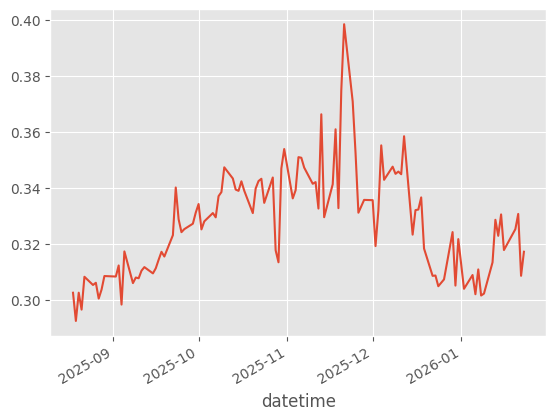

In [17]:
vol_data.timeseries.plot()

In [18]:
print(f"Dividend Type from Config: {BaseDataManager.CONFIG.dividend_type}")
print(f"Dividend Type from Dividend DataManager: {div_dm.CONFIG.dividend_type}")
print(f"Dividend Type from Dividend Data: {div_data.dividend_type}")
print("\n")
print(f"Dividend Type from ForwardDataManager: {fwd_dm.CONFIG.dividend_type}")
print(f"Dividend Type from Forward Data: {fwd_data.dividend_type}")
print("\n")
print(f"Dividend Type from SpotDataManager: {spot_dm.CONFIG.dividend_type}")
print("\n")
print(f"Dividend Type from OptionSpotDataManager: {option_spot_dm.CONFIG.dividend_type}")
print("\n")
print(f"Dividend Type from VolDataManager: {vol_dm.CONFIG.dividend_type}")
print(f"Dividend Type from Vol Data: {vol_data.dividend_type}")
# div_data.dividend_type


Dividend Type from Config: DivType.DISCRETE
Dividend Type from Dividend DataManager: DivType.DISCRETE
Dividend Type from Dividend Data: DivType.DISCRETE


Dividend Type from ForwardDataManager: DivType.DISCRETE
Dividend Type from Forward Data: DivType.DISCRETE


Dividend Type from SpotDataManager: DivType.DISCRETE


Dividend Type from OptionSpotDataManager: DivType.DISCRETE


Dividend Type from VolDataManager: DivType.DISCRETE
Dividend Type from Vol Data: DivType.DISCRETE


In [19]:
assert_synchronized_model(
    symbol=symbol,
    undo_adjust=undo_adjust,
    dividend_type=div,
    spot = spot_data,
    dividend = div_data,
    forward = fwd_data,
    option_spot = option_spot_data,
    vol = vol_data,)
    

In [20]:
vol_data.timeseries#.plot()

datetime
2025-08-18    0.302556
2025-08-19    0.292495
2025-08-20    0.302566
2025-08-21    0.296539
2025-08-22    0.308252
                ...   
2026-01-16    0.317794
2026-01-20    0.325238
2026-01-21    0.330667
2026-01-22    0.308599
2026-01-23    0.317175
Length: 110, dtype: float64

## TEST 3: Load all

In [21]:
from trade.datamanager.utils.model import LoadRequest, _load_model_data_timeseries


request = LoadRequest(
    symbol="AAPL",
    start_date=ts_start,
    end_date=ts_end,
    expiration=expiration,
    strike=strike,
    right=right,
    series_id=SeriesId.HIST,
    dividend_type=DivType.CONTINUOUS,
    endpoint_source=OptionSpotEndpointSource.EOD,
    vol_model=VolatilityModel.MARKET,
    market_model=OptionPricingModel.BINOMIAL,
    load_spot=True,
    load_dividend=True,
    load_forward=True,
    load_option_spot=True,
    load_vol=True,
    undo_adjust=True,
)


res = _load_model_data_timeseries(request)

2026-01-26 21:07:35 [test] trade.datamanager.vars INFO: Loading timeseries for AAPL...
2026-01-26 21:07:37 [test] trade.datamanager.dividend INFO: Using provided dividend_type: DivType.CONTINUOUS
2026-01-26 21:07:37 [test] EventDriven.riskmanager.market_data INFO: Sanitizing today's data from all stored timeseries data...
2026-01-26 21:07:38 [test] trade.datamanager.rates INFO: Cache hit for risk-free rate timeseries key: symbol:^IRX|interval:eod|artifact_type:rates|series_id:hist|fn_interval:1D
2026-01-26 21:07:38 [test] trade.datamanager.rates INFO: Cache fully covers requested date range for risk-free rate timeseries. Key: symbol:^IRX|interval:eod|artifact_type:rates|series_id:hist|fn_interval:1D
2026-01-26 21:07:38 [test] trade.datamanager.utils INFO: Sanitizing data from 2025-01-01 to 2026-01-23...
2026-01-26 21:07:38 [test] trade.datamanager.vars INFO: Timeseries for AAPL already loaded.
2026-01-26 21:07:38 [test] EventDriven.riskmanager.market_data INFO: Sanitizing today's data 

In [22]:
BaseDataManager.CONFIG.real_time_fallback_option = RealTimeFallbackOption.USE_LAST_AVAILABLE
div_dm.rt(
            maturity_date="2026-12-21",
            undo_adjust=True,
            fallback_option=None,
            dividend_type=DivType.DISCRETE
        ).daily_continuous_dividends

2026-01-26 21:07:38 [test] trade.datamanager.vars INFO: Timeseries for BA already loaded.
2026-01-26 21:07:38 [test] trade.datamanager.vars INFO: Timeseries for BA already loaded.
2026-01-26 21:07:38 [test] trade.datamanager.vars INFO: Timeseries for BA already loaded.
2026-01-26 21:07:39 [test] trade.optionlib.assets.dividend INFO: Using dual projection method for ticker BA


In [23]:
fwd_dm.rt(
            maturity_date="2026-12-21",
            dividend_type=DivType.DISCRETE,
            dividend_result=None,
        ).timeseries

2026-01-26 21:07:39 [test] trade.datamanager.vars INFO: Timeseries for BA already loaded.
2026-01-26 21:07:39 [test] trade.datamanager.vars INFO: Timeseries for BA already loaded.
2026-01-26 21:07:39 [test] trade.datamanager.vars INFO: Timeseries for BA already loaded.
2026-01-26 21:07:39 [test] trade.datamanager.forward INFO: Cache hit for forward timeseries key: symbol:BA|interval:eod|artifact_type:forward|series_id:hist|dividend_type:DISCRETE|maturity:2026-12-21|use_chain_spot:1
2026-01-26 21:07:39 [test] trade.datamanager.utils INFO: Sanitizing data from 2026-01-26 to 2026-01-26...


datetime
2026-01-26    256.565774
dtype: float64

In [24]:
option_spot_dm.rt(
    expiration=expiration,
    right=right,
    strike=strike,
).timeseries

,bid_size,bid_exchange,bid,bid_condition,ask_size,ask_exchange,ask,ask_condition,midpoint,weighted_midpoint
datetime,,,,,,,,,,
2026-01-26,127,4,16.7,50,401,65,20.35,50,18.525,19.472064


In [25]:
spot_dm.rt().spot

2026-01-26 21:07:40 [test] EventDriven.riskmanager.market_data CRITICAL: Reloading timeseries data for symbol BA.
2026-01-26 21:07:42 [test] EventDriven.riskmanager.market_data INFO: Sanitizing today's data from all stored timeseries data...


open                251.490005
high                251.580002
low                 247.404999
close               248.429993
volume                 8401529
chain_price         248.429993
unadjusted_close    248.429993
split_ratio                1.0
cum_split                  1.0
split_factor               1.0
max_cum_split              1.0
is_split_date            False
Name: 2026-01-26 00:00:00, dtype: object

In [42]:
vol_dm.rt(
    expiration=expiration,
    right=right,
    strike=strike,
    market_model=OptionPricingModel.BINOMIAL,
    dividend_type=DivType.DISCRETE,
).timeseries

2026-01-26 21:18:26 [test] trade.datamanager.vol INFO: VolDm Using specified dividend type: DivType.DISCRETE
2026-01-26 21:18:26 [test] trade.datamanager.utils INFO: Using cached date range for 2026-01-26 00:00:00 - 2026-01-26 00:00:00 and option tick BA20260821C270
2026-01-26 21:18:26 [test] trade.datamanager.utils INFO: Cache partially covers requested date range for timeseries data structure. Key: symbol:BA|interval:eod|artifact_type:iv|series_id:hist|american:1|dividend_type:discrete|endpoint_source:quote|expiration:2026-08-21|n_steps:100|option_pricing_model:Binomial|right:C|strike:270|volatility_model:market. Fetching missing dates: [Timestamp('2026-01-26 00:00:00')]
2026-01-26 21:18:26 [test] trade.datamanager.utils INFO: Cache partially covers requested date range. Key: symbol:BA|interval:eod|artifact_type:iv|series_id:hist|american:1|dividend_type:discrete|endpoint_source:quote|expiration:2026-08-21|n_steps:100|option_pricing_model:Binomial|right:C|strike:270|volatility_model:

datetime
2026-01-26    0.335155
dtype: float64

In [41]:
spot_dm.get_spot_timeseries("2026-01-26", "2026-01-26")

2026-01-26 21:18:25 [test] trade.datamanager.vars INFO: Timeseries for BA already loaded.
2026-01-26 21:18:25 [test] EventDriven.riskmanager.market_data INFO: Current time is after 6 PM NY time. Skipping sanitization of today's data.
2026-01-26 21:18:25 [test] trade.datamanager.utils INFO: Sanitizing data from 2026-01-26 to 2026-01-26...


SpotResult(symbol='BA', key=None, is_empty=False, undo_adjust=True)

In [39]:
from trade.datamanager.vars import TS
TS.load_timeseries("BA")

In [ ]:
vol_dm.rt(
    expiration=expiration,
    right=right,
    strike=strike,
    market_model=OptionPricingModel.BSM,
    dividend_type=DivType.CONTINUOUS,
).timeseries

2026-01-26 13:37:36 [test] trade.datamanager.vol INFO: VolDm Using specified dividend type: DivType.CONTINUOUS
2026-01-26 13:37:36 [test] trade.datamanager.utils INFO: Using cached date range for 2026-01-26 00:00:00 - 2026-01-26 00:00:00 and option tick BA20260821C270
2026-01-26 13:37:36 [test] trade.datamanager.utils INFO: No cache found for key: symbol:BA|interval:eod|artifact_type:iv|series_id:hist|dividend_type:continuous|endpoint_source:quote|expiration:2026-08-21|option_pricing_model:Black-Scholes|right:C|strike:270|volatility_model:market. Fetching from source.
2026-01-26 13:37:36 [test] trade.datamanager.rates INFO: Cache hit for risk-free rate timeseries key: symbol:^IRX|interval:eod|artifact_type:rates|series_id:hist|fn_interval:1D
2026-01-26 13:37:36 [test] trade.datamanager.rates INFO: Cache partially covers requested date range for risk-free rate timeseries. Key: symbol:^IRX|interval:eod|artifact_type:rates|series_id:hist|fn_interval:1D. Fetching missing dates: [Timestamp(

datetime
2026-01-26    0.328943
dtype: float64

In [2]:
from dbase.database.db_utils import set_environment_context
from algo.positions.loaders.configs import get_configs_v2
from algo.positions.loaders.cash.core import resolve_cash_on_date, resolve_all_strategies_cash_on_date, save_cash_missing_dates
set_environment_context("long_bbands")

configs = get_configs_v2().get_configs("long_bbands")
configs

2026-01-26 22:34:38 [test] trade.helpers.Logging INFO: Logging Root Directory: /Users/chiemelienwanisobi/cloned_repos/QuantTools/logs
2026-01-26 22:34:38 [test] trade.helpers.clear_cache INFO: No expired caches to delete on 2026-01-26.
2026-01-26 22:34:57 [test] algo.__init__ CRITICAL: ALGO_DIR not on main branch; skipping runtime safeguards.
2026-01-26 22:34:57 [test] dbase.DataAPI.ThetaData.proxy INFO: Refreshed proxy URL: http://54.205.248.219:5500/thetadata
2026-01-26 22:34:57 [test] dbase.DataAPI.ThetaData.proxy INFO: Using Proxy URL: http://54.205.248.219:5500/thetadata
2026-01-26 22:34:57 [test] dbase.DataAPI.ThetaData INFO: Using V2 of the ThetaData API
HI
USER: chidi


Scheduled Data Requests will be saved to: /Users/chiemelienwanisobi/cloned_repos/QuantTools/module_test/raw_code/DataManagers/scheduler/requests.jsonl
HI
USER: chidi
2026-01-26 22:35:00 [test] DataManager.py CRITICAL: Using ProcessSaveManager for saving data.
[get_engine] Creating engine for DB: master_config (b

Loading BokehJS ...

HI
USER: chidi
HI
USER: chidi
HI
USER: chidi
HI
USER: chidi


LiveSlugConfigV2(slug='long_bbands', initial_capital=np.float64(6000.0), trade_meta={'cash': 6000, 'weights': {'BA': 0.05, 'AMD': 0.10089071599862968, 'AAPL': 0.05, 'AMZN': 0.05, 'COST': 0.1132237067488866, 'META': 0.14148681055155876, 'NFLX': 0.09780746831106545, 'NVDA': 0.29659129838985954, 'SBUX': 0.05, 'TSLA': 0.05}, 'ruin_value': 3000, 'strat_name': 'LongBBandsTrend_SL', 'strat_slug': 'long_bbands', 'warmup_period': 300, 'executor_level': 3, 'traded_symbols': ['AAPL', 'NVDA', 'TSLA', 'COST', 'AMZN', 'META', 'AMD', 'SBUX', 'NFLX', 'BA'], 'quit_on_max_tries': False, 'quit_on_max_factor': True, 'official_start_date': Timestamp('2026-01-02 00:00:00'), 'open_missed_signals': True, 'weights_last_refresh': Timestamp('2026-01-01 00:00:00')}, backtest_bundle=RunConfigBundle(run_name='long_bbands', created_at=datetime.datetime(2025, 11, 29, 16, 31, 28, 736350), configs=['ChainConfig', 'SkipCalcConfig', 'BacktesterConfig', 'OptionPriceConfig', 'OrderPickerConfig', 'RiskManagerConfig', 'Order

In [1]:
from dotenv import load_dotenv
import os
os.environ.get("QUANTTOOLS_USER")

'CHIDI'